# Introduction To Function Calling!


### Writing A Local Python Tool

In [3]:
#pip install matplotlib

In [4]:
from matplotlib import pyplot as plt

def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

In [5]:
USER_QUERY = "Hey can you plot y=10x where x=1, 2, 3 for me?"

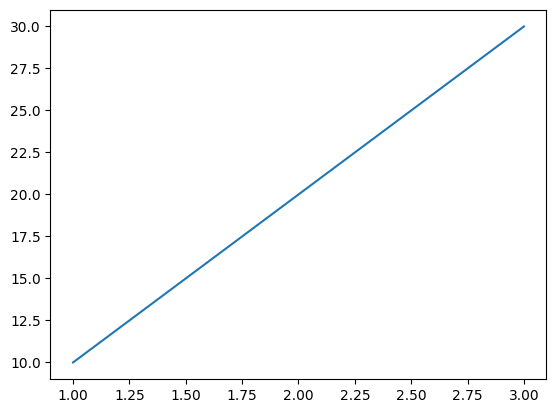

In [6]:
plot_some_points(x=[1, 2, 3], y=[10, 20, 30])

In [7]:
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''

In [11]:
#pip install requests

In [12]:
from utils import query_raven
function_call = query_raven(prompt)

ConnectTimeout: HTTPConnectionPool(host='nexusraven.nexusflow.ai', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000023595D50C50>, 'Connection to nexusraven.nexusflow.ai timed out. (connect timeout=None)'))

In [ ]:
print (function_call)

NameError: name 'function_call' is not defined

In [ ]:
exec(function_call)

NameError: name 'function_call' is not defined

#### Try Your Own!

In [ ]:
USER_QUERY = ""

In [ ]:
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''
from utils import query_raven
function_call = query_raven(prompt)

### Let's Try Another Example!

#### Let's define a function

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_clown_face(face_color='yellow', eye_color='black', 
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized. 
    """
    # Constants
    face_radius = 0.4
    nose_radius = 0.1
    nose_x, nose_y = 0.5, 0.5
    mouth_x, mouth_y = 0.5, 0.3
    mouth_color = 'black'
    eye_size = 0.05
    mouth_size = (0.3, 0.1)
    eye_offset=(0.15, 0.15)
    mouth_theta = (200, 340)

    fig, ax = plt.subplots()
    # Face
    face = patches.Circle((0.5, 0.5), face_radius, color=face_color, fill=True)
    ax.add_patch(face)
    # Eyes
    eye_left = patches.Circle((0.5-eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    eye_right = patches.Circle((0.5+eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    ax.add_patch(eye_left)
    ax.add_patch(eye_right)
    # Nose
    nose = patches.Circle((nose_x, nose_y), nose_radius, color=nose_color, fill=True)
    ax.add_patch(nose)
    # Mouth
    mouth = patches.Arc((mouth_x, mouth_y), mouth_size[0], mouth_size[1], angle=0, 
                        theta1=mouth_theta[0], theta2=mouth_theta[1], color=mouth_color, linewidth=2)
    ax.add_patch(mouth)
    # Setting aspect ratio to 'equal' to ensure the face is circular
    ax.set_aspect('equal')
    # Remove axes
    ax.axis('off')
    plt.show()

#### Let's Define A Prompt

In [ ]:
USER_QUERY = \
"Hey can you draw a pink clown face with a red nose" 

raven_prompt = \
'''
Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: {query}<human_end>
'''
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)


In [ ]:
print (raven_prompt_with_query)

In [ ]:
from utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)

#### Let's Run The Call

In [ ]:
exec(raven_call)

#### Make Your Own Clown!


In [ ]:
USER_QUERY = ""
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)

from utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)
exec(raven_call)

#### Using OpenAI FC

In [ ]:
import json
from openai import OpenAI
from dotenv import load_dotenv
import os

_ = load_dotenv()

def query_openai(msg, functions=None):
  load_dotenv()
  GPT_MODEL = "gpt-3.5-turbo"

  openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
  openai_response = openai_client.chat.completions.create(
    model = GPT_MODEL,
    messages = [{'role': 'user', 'content': msg}],
    tools = functions)
  return openai_response

In [ ]:
openai_function = {
  "type": "function",
  "function": {
    "name": "draw_clown_face",
    "description": "Draws a customizable, simplified clown face using matplotlib.",
    "parameters": {
      "type": "object",
      "properties": {
        "face_color": {
          "type": "string",
          "description": "Color of the clown's face."
        },
        "eye_color": {
          "type": "string",
          "description": "Color of the clown's eyes."
        },
        "nose_color": {
          "type": "string",
          "description": "Color of the clown's nose."
        }
        }
      }
    }
  }

openai_msg = \
"Hey can you draw a pink clown face with a red nose"

In [ ]:
result = query_openai(openai_msg, functions=[openai_function])


In [ ]:
print (result.choices[0].message.tool_calls[0].function)

In [ ]:
tool_name = result.choices[0].message.tool_calls[0].function.name
tool_args = result.choices[0].message.tool_calls[0].function.arguments


In [ ]:
function_call = f"{tool_name}(**{tool_args})"


In [ ]:
print (function_call)

In [ ]:
exec(function_call)